In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('suicide_data.csv')

# Inspect the first few rows
data

# Check for missing values and data types
#print(data.info())

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2.156625e+09,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,6.306708e+10,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,6.306708e+10,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,6.306708e+10,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,6.306708e+10,2309,Generation Z


In [9]:
# Handle missing values by removing or imputing them
data = data.dropna()  # or use imputation techniques for missing values

# Example: Replace missing values with the median
data['suicide_rate'] = data['suicides/100k pop'].fillna(data['suicides/100k pop'].median())

# Convert columns to appropriate data types if necessary
data['year'] = pd.to_datetime(data['year'])

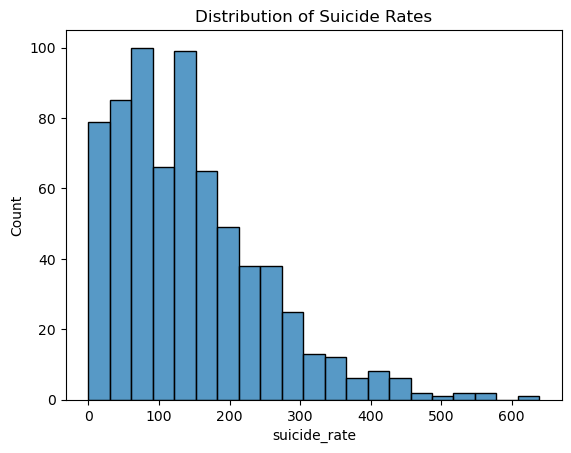

In [11]:
# Group by region and date to get the aggregated suicide rate over time
aggregated_data = data.groupby(['country', 'year']).agg({'suicide_rate': 'sum'}).reset_index()

# Visualize the distribution of suicide rates
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(aggregated_data['suicide_rate'])
plt.title('Distribution of Suicide Rates')
plt.show()

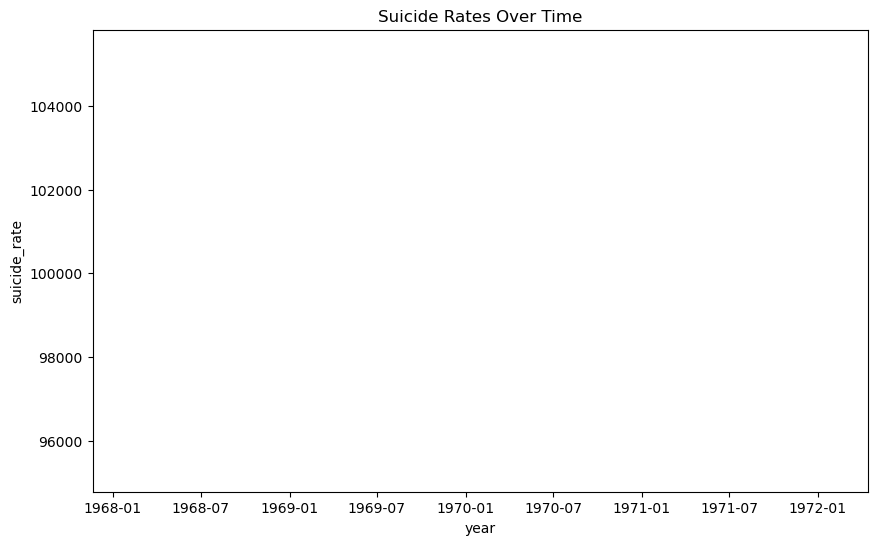

In [13]:
monthly_data = data.groupby(pd.Grouper(key='year', freq='M')).agg({'suicide_rate': 'sum'}).reset_index()

# Plot suicide trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='suicide_rate', data=monthly_data)
plt.title('Suicide Rates Over Time')
plt.show()